In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
HOME_PATH = os.path.expanduser('~')

PROJECT_NAME = "toy_model"
PROJECT_PATH = f"{HOME_PATH}/Workspace/{PROJECT_NAME}"
DATA_PATH = f"{PROJECT_PATH}/data"

In [3]:
df = pd.read_csv(f"{DATA_PATH}/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Simple Data Analisys

In [4]:
label = "Survived"

## Row Count

In [5]:
df.shape[0]

891

## Null Values

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Column Types

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Columns Analisys

### Pclass

In [8]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

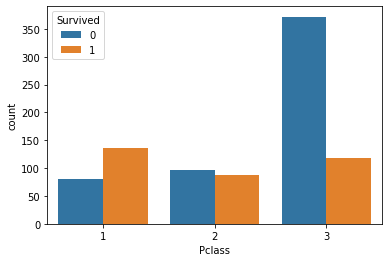

In [9]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

In [10]:
df[["Pclass", label]].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


### Name

In [11]:
df["Title"] = df['Name'].apply(lambda x: x.split(", ")[-1].split(".")[0])

In [12]:
df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Jonkheer          1
Mme               1
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Don               1
Name: Title, dtype: int64

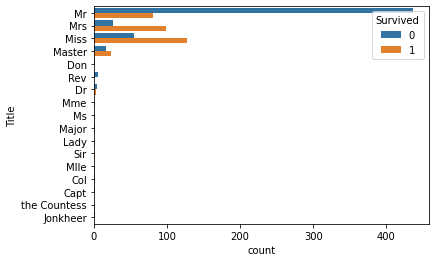

In [13]:
sns.countplot(y="Title", hue="Survived", data=df)
plt.show()

In [14]:
df[["Title", label]].corr()

,Survived
Survived,1.0


## Sex

In [15]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

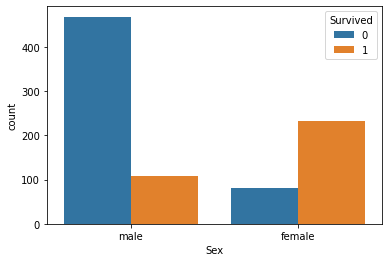

In [16]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

In [17]:
df[["Sex", label]].corr()

,Survived
Survived,1.0


### SibSp

In [18]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

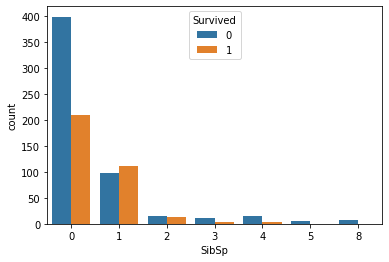

In [19]:
sns.countplot(x="SibSp", hue="Survived", data=df)
plt.show()

In [20]:
df[["SibSp", label]].corr()

,SibSp,Survived
SibSp,1.000000,-0.035322
Survived,-0.035322,1.000000


### Parch

In [21]:
df["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

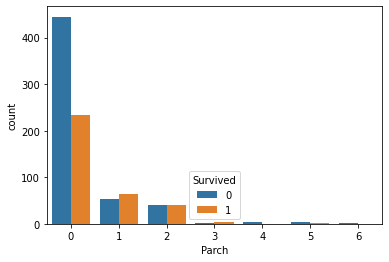

In [22]:
sns.countplot(x="Parch", hue="Survived", data=df)
plt.show()

In [23]:
df[["Parch", label]].corr()

,Parch,Survived
Parch,1.000000,0.081629
Survived,0.081629,1.000000


### Fare

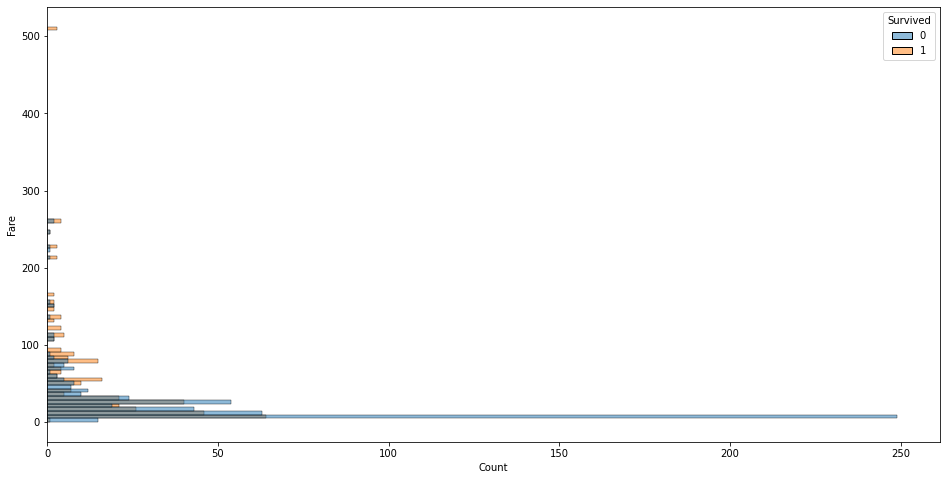

In [24]:
plt.figure(figsize=(16,8))
sns.histplot(y="Fare", data=df, hue="Survived")
plt.show()

In [25]:
df[["Fare", label]].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


In [26]:
df[["Fare", "Pclass"]].corr()

,Fare,Pclass
Fare,1.0000,-0.5495
Pclass,-0.5495,1.0000


## Selected Variables

In [30]:
df_analized = df[["PassengerId", "Pclass", "Title", "Sex", "Fare", "Survived"]]

In [31]:
df_analized.corr()

,PassengerId,Pclass,Fare,Survived
PassengerId,1.000000,-0.035144,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.549500,-0.338481
Fare,0.012658,-0.549500,1.000000,0.257307
Survived,-0.005007,-0.338481,0.257307,1.000000


In [32]:
df_analized.isna().sum()

PassengerId    0
Pclass         0
Title          0
Sex            0
Fare           0
Survived       0
dtype: int64